In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_diabetes
from sklearn import linear_model

In [2]:
a = np.array([[3,3.5,2],[3.2,3.6,3],[6,7,4]])
a
np.linalg.matrix_rank(a)

2

In [3]:
a = np.arange(100).reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [4]:
for i in range(10):
    a[i,i] = 1

In [5]:
a

array([[ 1,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10,  1, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21,  1, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32,  1, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43,  1, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54,  1, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65,  1, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76,  1, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87,  1, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98,  1]])

In [6]:
np.linalg.matrix_rank(a)

10

In [7]:
np.linalg.inv(a)

array([[-4.26333543e-01,  1.17210814e-01,  4.37087018e-02,
         2.07392917e-02,  9.52167282e-03,  2.87419497e-03,
        -1.52336730e-03, -4.64795101e-03, -6.98241011e-03,
        -8.79280697e-03],
       [ 1.48013251e-01, -1.09763677e-01, -2.25049036e-03,
         9.73806051e-05,  1.24401526e-03,  1.92350247e-03,
         2.37300938e-03,  2.69239588e-03,  2.93101797e-03,
         3.11607184e-03],
       [ 7.30443563e-02, -3.71727308e-03, -4.76810050e-02,
         1.08032875e-03,  1.63818943e-03,  1.96877354e-03,
         2.18746764e-03,  2.34285555e-03,  2.45894997e-03,
         2.54898238e-03],
       [ 4.96165766e-02, -1.82777172e-03,  6.21959150e-04,
        -2.98625000e-02,  1.76136886e-03,  1.98292075e-03,
         2.12948584e-03,  2.23362420e-03,  2.31142872e-03,
         2.37176692e-03],
       [ 3.81751028e-02, -9.04991990e-04,  9.55964907e-04,
         1.53751394e-03, -2.14342877e-02,  1.98982985e-03,
         2.10116915e-03,  2.18027865e-03,  2.23938346e-03,
         2.

# 线性回归

In [25]:
diabetes = load_diabetes()

In [9]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
from sklearn.model_selection import train_test_split

In [26]:
data=diabetes['data']

In [27]:
target = diabetes['target']

In [33]:
feature_names = diabetes['feature_names']

In [34]:
df = pd.DataFrame(data=data,columns=feature_names)
df
#body mass idnex
#blood pressure

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [35]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=42)

In [36]:
data.shape

(442, 10)

In [17]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [18]:
linear.score(x_train,y_train)

0.5192984113120138

In [19]:
#线性方程的系数
linear.coef_

array([  -7.54252239, -249.86463297,  504.56296275,  327.72042661,
       -837.21901733,  500.89354012,  111.99676033,  179.44813964,
        766.13123696,   88.95362046])

In [20]:
#截距
linear.intercept_

151.8698424001083

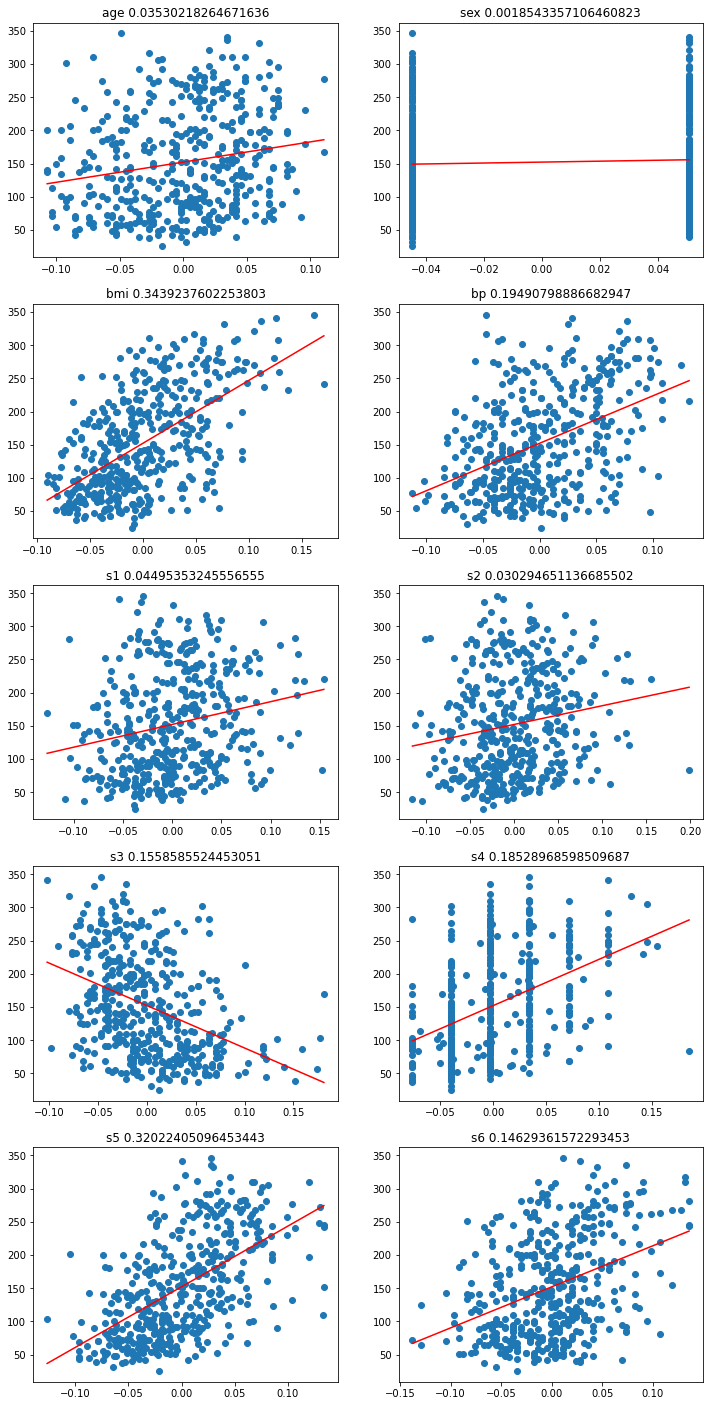

In [21]:
#研究单个特征对结果的影响
plt.figure(figsize=(2*6,5*5))
for i,col in enumerate(df.columns):
    axes = plt.subplot(5,2,i+1)
    x_train1 = df[[col]]
    linear = linear_model.LinearRegression()
    linear.fit(x_train1,target)
    score = linear.score(x_train1,target)
    
    
    
    plt.scatter(x_train1,target)
    x = np.linspace(x_train1.min(),x_train1.max(),100)
    y = linear.coef_ * x+linear.intercept_
    axes.plot(x,y,c='r')
    axes.set_title(col+' '+str(score))
    axes

In [22]:
#50个样本，200个特征
x = np.random.randn(50,200)
y = np.random.randn(50)
display(x,y)

array([[-0.46926366, -0.29824047,  1.07327943, ..., -0.05047571,
        -1.13116613, -0.50869784],
       [ 0.18939336,  0.02915275, -1.23057564, ...,  1.45866915,
        -0.92816843, -0.54647912],
       [-1.55307237, -0.73393601,  0.99050313, ...,  0.24917496,
        -1.42407119, -0.55114854],
       ...,
       [ 1.09017397, -1.41507684, -0.06635779, ...,  1.27154695,
        -0.79346232, -1.13486389],
       [ 1.36020555, -0.28034557,  0.56381679, ..., -0.37802318,
         0.84659219,  0.23432054],
       [-0.17337732,  1.53574322,  1.32572075, ...,  0.10808954,
         0.96413374, -0.02130673]])

array([-0.82913268, -0.29400188, -0.71074119,  0.45274627,  0.50405791,
       -0.23318139,  0.32989668,  0.77517028,  0.19489417,  0.52006561,
       -1.08998338,  0.18425885, -0.62297824, -0.13966724,  1.29964676,
       -1.00349103, -0.4070974 ,  0.74134743, -0.49124711, -1.00285587,
       -0.67969592, -0.482031  ,  0.0226565 ,  0.33879542, -1.39007985,
       -0.52877997,  0.59203686,  0.50763877, -0.81109062, -0.41080437,
       -0.94524267, -0.24615613,  0.96091446,  1.08671364,  1.55370216,
       -0.72930005, -0.26712573, -0.77257921,  2.05811803,  1.33696722,
       -0.91310855, -0.67926577,  0.89560096,  2.57429606, -0.28154829,
        0.07346844,  0.19118847,  0.72483879, -1.73398189,  0.29447832])

In [23]:
linear = linear_model.LinearRegression()
linear.fit(x,y)

LinearRegression()

In [24]:
linear.score(x,y)

1.0

![岭回归](./岭回归.png)

In [30]:
n=np.array([[1.001,3,5],[1,2.001,3],[2,4.001,6.001]])
n

array([[1.001, 3.   , 5.   ],
       [1.   , 2.001, 3.   ],
       [2.   , 4.001, 6.001]])

In [31]:
n.T

array([[1.001, 1.   , 2.   ],
       [3.   , 2.001, 4.001],
       [5.   , 3.   , 6.001]])

In [32]:
np.dot(n.T,n)

array([[ 6.002001, 13.006   , 20.007   ],
       [13.006   , 29.012002, 45.013001],
       [20.007   , 45.013001, 70.012001]])

In [33]:
np.linalg.inv(np.dot(n.T,n))

array([[  559798.88732027, -1115678.32980701,   557334.92657444],
       [-1115678.329807  ,  2223559.16405266, -1110776.63000394],
       [  557334.92657444, -1110776.63000394,   554887.59250245]])

# 岭回归

### 岭回归适用于过拟合或者多重共线性

### 岭回归系数研究

In [7]:
X = 1/(np.arange(1,11)+np.arange(10).reshape(10,1))#作为训练数据10*10

In [5]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y = np.arange(1,11)

使用岭回归

In [12]:
from sklearn.linear_model import Ridge

In [10]:
#整数线性等分
# npalinspace()
#对数周等分
alphas = np.logspace(-2,-10,200)

In [13]:
ridge=Ridge()
coefs=[]
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X,y)
    coef=ridge.coef_
    coefs.append(coef)

In [15]:
len(coefs)

200

Text(0.5, 1.0, 'the relationship of alphas and weight')

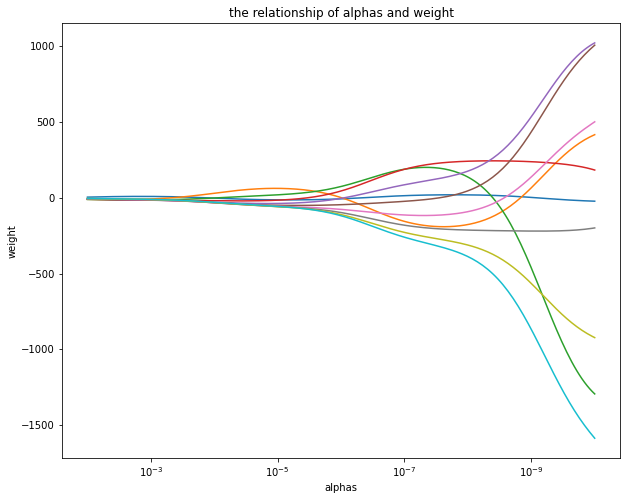

In [23]:
plt.figure(figsize=(10,8))
plt.xscale('log')
plt.plot(alphas,coefs)
xmin,xmax=plt.xlim()
plt.xlim(xmin=xmax,xmax=xmin)#xlim返回当前x轴的界限
plt.xlabel('alphas')
plt.ylabel('weight')
plt.title('the relationship of alphas and weight')

岭回归可以把一些不重要的东西去掉m

重新预测diabetes

In [29]:
ridge = Ridge(0.001)

In [30]:
ridge.fit(data,target)

Ridge(alpha=0.001)

In [32]:
ridge.score(data,target)
#线性回归是0.519

0.5177078692545862

In [38]:
linear = linear_model.LinearRegression()
linear.fit(data,target).score(data,target)

0.5177494254132934

# lasso回归

原理：拉格朗日乘数法


参数w绝对值的和小于等于lambda，在lambda（一阶正则）足够小的时候，一些系数会因此被迫缩减到0

In [40]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso(alpha=0.1)

In [44]:
lasso.fit(X,y).score(X,y)

0.6363643343281071

# 线性回归、岭回归和lasso回归区别

In [73]:
#生成数据
X=np.random.randn(50,200)
coef=np.random.randn(200)
y=np.dot(X,coef)
y

array([-10.14429132,   1.23386703,  -9.94885125,  10.83485639,
        -9.02694256,  -1.88575604,  -4.53964422,  -8.89848265,
       -14.15933222, -10.64849025,  -1.42285145,   2.05601177,
        -7.14611449,  -1.98906841,  -7.94147126,  -6.92832136,
       -17.70070686,  10.83419917,  -9.31813565,   1.15425055,
         0.96414328,  14.26408706,   2.39281532,  -7.86755487,
       -15.39711614,  -5.93745339,   5.5580991 ,   4.97573415,
        -5.36609759, -25.37130123,  -6.31502485,  40.31927319,
       -11.80419369,  -0.59005432,  -0.31010721, -22.49398392,
        -7.44840962, -11.95292551, -14.64555913, -15.83569247,
       -20.43917556,  -6.72521788,   3.87680597, -14.01684235,
         8.09614258, -18.94532747,  18.97752314,  13.28083811,
        -5.41871095,  -2.64135884])

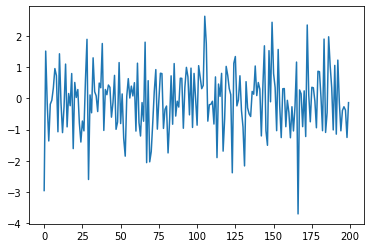

In [77]:
plt.plot(coef)

In [75]:
linear = linear_model.LinearRegression()
linear.fit(X,y)

LinearRegression()

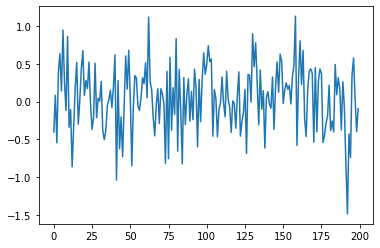

In [52]:
plt.plot(linear.coef_)

In [ ]:
查看是否相同coef和coef_

In [54]:
index=np.arange(0,200)
np.random.shuffle(index)
index

array([128,   3,   2,  91,  73,  34,  70, 116, 135,  35, 119,  18, 136,
       110, 105, 175,  20,  83, 100, 173, 187, 129, 161, 106,  93,  63,
        42,  31, 185,  85, 109, 118, 176, 170, 149, 179,  51,  98,  17,
        48,  72, 191,  23,  89,  49, 145, 181, 111,  41, 193,  38, 123,
       160,  47,  43, 140,  86,  11,  19,  37, 134,   1,  60, 107, 159,
       189, 162, 164, 199,  81, 112,  57, 148, 192,  62,  76,  94,  55,
        88, 167, 190, 169, 163,  50, 132,  56, 139,  77, 130,  39, 196,
       157,  67,  87, 126, 117, 120,  10, 131,  71,   0,  82, 138, 114,
        29,   6, 150, 172,  22,  74, 153, 144,  97,  79,  45,  27,  28,
        95,  68,   8,  92,  15,  80, 166, 113, 142,  36, 133,  65, 102,
       103,  16,  66,  24,  64, 152, 174,  69,  30,  26,  33,  58,  75,
        40, 186, 115,   7, 197, 183,  59,   9,  52, 198,  13, 154, 195,
       121,  46,   5, 143, 108, 101,  32,  44, 127, 137, 104, 184,  96,
       158, 165, 147,  54, 146, 156, 168,  61,  84,  12, 125,  7

In [78]:
coef[index[:190]]=0
y=np.dot(X,coef)

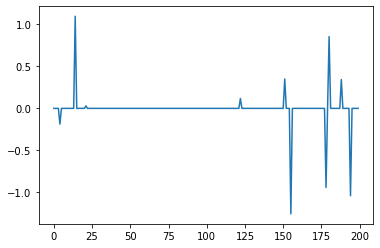

In [79]:
plt.plot(coef)

In [80]:
linear=linear_model.LinearRegression()
linear.fit(X,y)
linear_coef=linear.coef_

In [81]:
ridge=Ridge(alpha=0.001,)
ridge.fit(X,y)
ridge_coef=ridge.coef_

In [82]:
lasso=Lasso(alpha=0.001,max_iter=10000)
lasso.fit(X,y)
lasso_coef=lasso.coef_

Text(0.5, 1.0, 'Lasso')

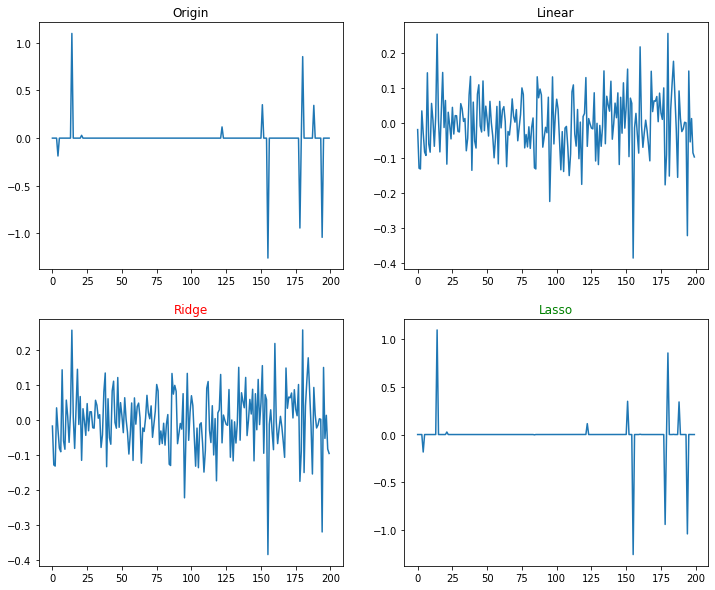

In [83]:
plt.figure(figsize=(2*6,2*5))
axes1=plt.subplot(2,2,1)
axes1.plot(coef)
axes1.set_title('Origin',c='k')

axes2=plt.subplot(2,2,2)
axes2.plot(linear_coef)
axes2.set_title('Linear')

axes3=plt.subplot(2,2,3)
axes3.plot(ridge_coef)
axes3.set_title('Ridge',c='r')

axes4=plt.subplot(2,2,4)
axes4.plot(lasso_coef)
axes4.set_title('Lasso',c='g')